# 1.3.0 Matplotlib - pylab napodobení matlabu

Zapneme zobrazování výstupů z `matplotlib` přímo v sešitu.

In [19]:
%matplotlib inline

Kdo si chce ušetřit psaní na úkor přehlednosti, může použít `pylab`.
Nedoporučuji, protože naní jasné která funkce pochází ze které knihovny.

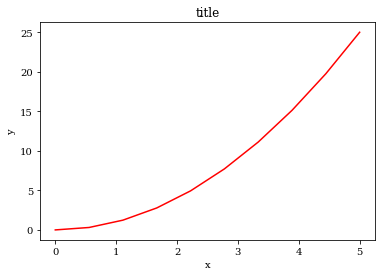

In [20]:
from pylab import *

# make some data
x = linspace(0, 5, 10)
y = x ** 2

# plottig
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

## 1.3.1 Matplotlib - liniové grafy

Lepší přístup:
- každou knihovnu si importovat po (standardní) zkratkou
- pracovat s objekty `matplotlib` explicitně:

   - možnost mít více obrázků (`Figure`)
   - možnost mít více rámečků (`Axes`) v obrázku

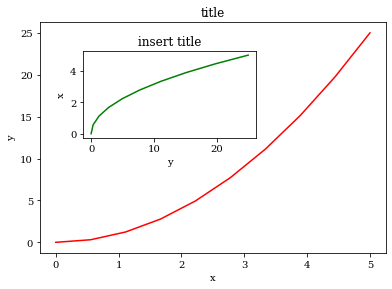

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# make some data
x = np.linspace(0, 5, 10)
y = x ** 2

# nice plotting
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r') # red line
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g') # green line
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

### Pojmenování grafických částí grafů

![](./figures/anatomy.png)

In [22]:
### Matice rámečků (axes)

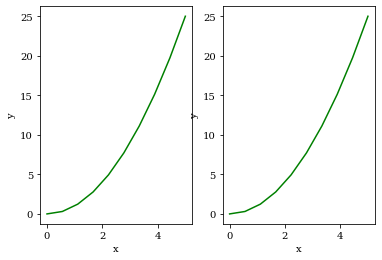

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'green')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
# fig.tight_layout()

### Obrázek (Figure) - rozměry, poměr stran, DPI

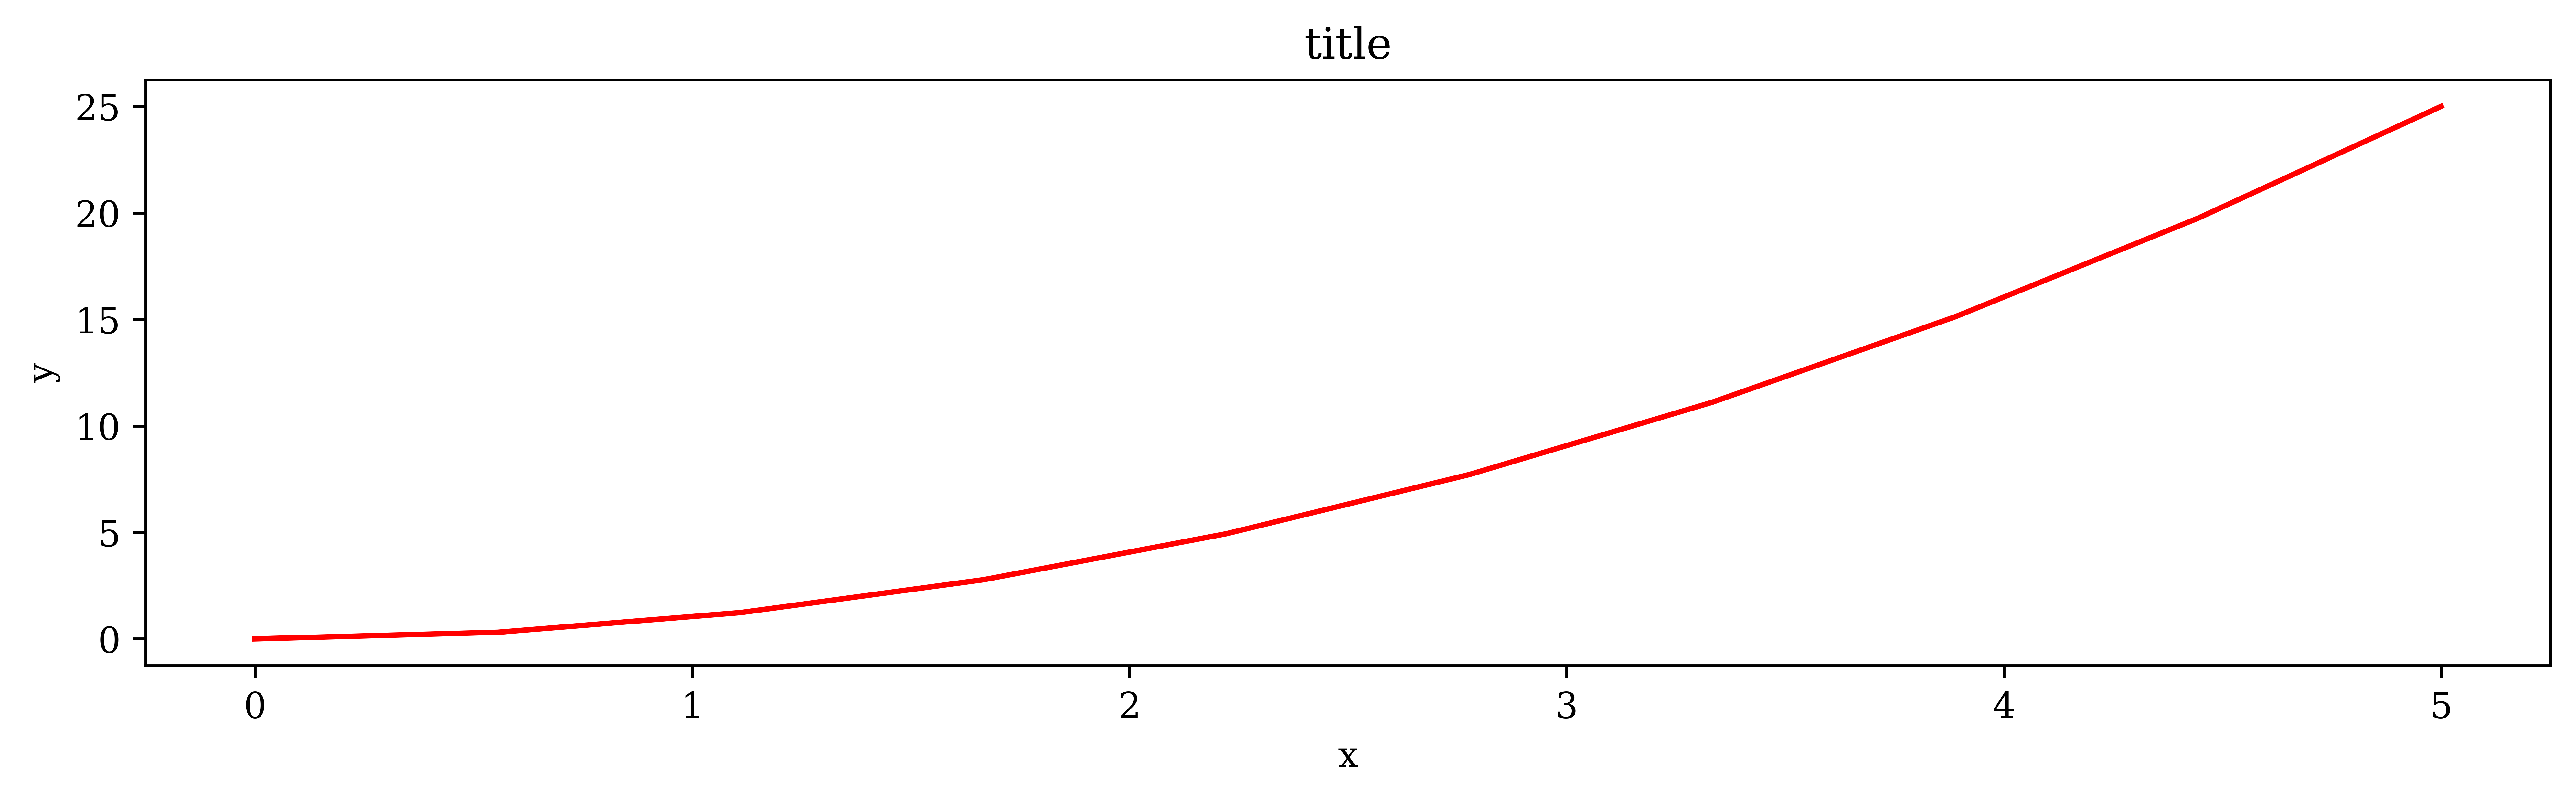

In [24]:
fig, axes = plt.subplots(figsize=(12,3), dpi=800)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Ukládání obrázků

- `show()` - zobrazení vytvořených obrázků, potřeba mimo IPython
- vektorové formáty: PDF, SVG, ...
- rastrové formáty: PNG, JPG, ...


In [25]:
# fig.show()  # display image out of the IPython
fig.savefig("obrazek.pdf")
fig.savefig("obrazek.png", dpi=200)

# kontrola, vypis souboru PNG a PDF v aktualnim adresari
! ls *.png *.pdf

filename.pdf  filename.png  obrazek.pdf  obrazek.png


### Legenda, Latex popisky

- popiska linky parametrem `label`, automaticky uloží i barvu, styl, marker, ...
- zobrazení legendy pomocí metody `legend`
- pozice se zadává parametrem `loc`:
    - `best, right, left, center`
	- `upper left/center/right`
	- `lower left/center/right`
	- `center left/right`
- možno sestavit legendu ručně, viz. [příklad](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html) 

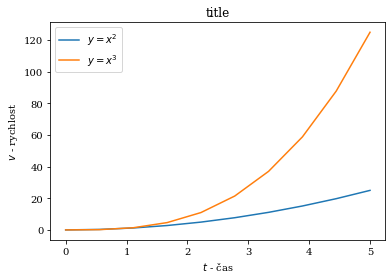

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x**3, label="$y = x^3$")
ax.legend(loc="upper left"); # upper left corner
ax.set_xlabel('$t$ - čas ')
ax.set_ylabel("$v$ - rychlost")

ax.set_title('title');

In [27]:
# Fonts setting

# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})


### Grafické vlastnosti

#### Barvy
- barva čáry, parameter: `c`/`color`
- barva vnitřku a okraje značky, parametr: `markerfacecolor`, `markeredgecolor`

- barvy specifikované písmenem (MATLAB syntaxe): {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
- barvy specifikované názvem 'red', 'purple', ... [seznam](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- barevne mapy
- RGB: 
  - tuple float z intervalu $[0, 1]$: (`<red>`, `<green>`, `<blue>`, `<alpha>`)
  - řetězec: `"#1155dd"`
- a [další](https://matplotlib.org/3.1.1/tutorials/colors/colors.html)

#### Styly
- [styl čáry](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html), parametr: `ls`/`linestyle`
- tloušťka čáry, parameter `lw`/`linewidh`
- [druh značky](https://matplotlib.org/3.1.1/api/markers_api.html) (marker), parametr: `m`/`marker`
- velikost značky, parametr: `markersize`

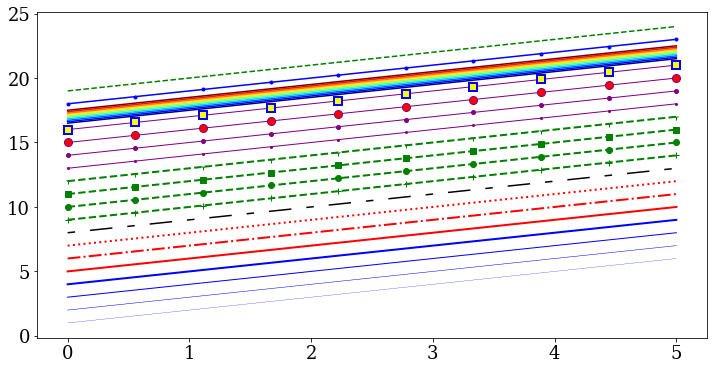

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

# colormap colors
shifts = np.linspace(-0.5, 0.5, 10)
for s in shifts:
    cNorm  = plt.Normalize(vmin=np.min(shifts), vmax=np.max(shifts))
    ax.plot(x, x+17+s, color=plt.cm.jet(cNorm(s)))

# MATLAB style line color and style
ax.plot(x, x+18, 'b.-') # blue line with dots
ax.plot(x, x+19, 'g--') # green dashed line


### Další volby
- Vlastnosti os (vše ve variantách `set_x...` a `set_y...`):
    - [rozsah os](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.set_xlim.html):
      `ax.set_xlim`
    - [logaritmické měřítko](
      https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.set_xscale.html#matplotlib.axes.Axes.set_xscale):
      `ax.set_xscale('log')`
    - [značky a popisky na osách]():
      [`set_xticks`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks),
      [`set_xticklabels`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html#matplotlib.axes.Axes.set_xticklabels),
    - [různé automatické popiskovače](http://matplotlib.org/api/ticker_api.html)
    - exponenciální tvar popisek os: 
  [ScalarFormatter](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/scalarformatter.html)
- okraje obrázku:
  [`fig.subplots_adjust`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
- mřížka: [`ax.grid`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.grid.html)
- popisky a šipky v obrázku: [text and annotation](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html)

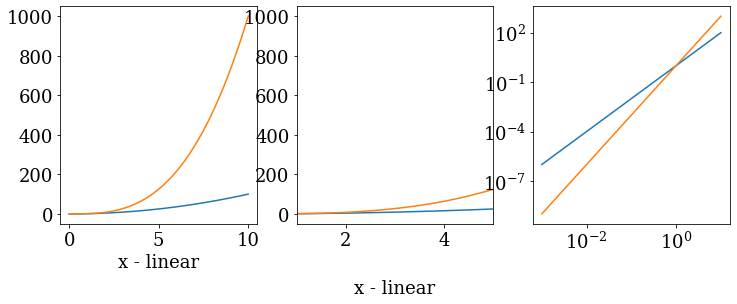

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax0, ax1, ax2 = axes
x = np.linspace(1e-3, 10, 1000)

ax0.plot(x, x**2, x, x**3)
ax0.set_xlabel('x - linear')

ax1.plot(x, x**2, x, x**3)
ax1.set_xlim((1, 5))
ax1.set_xlabel('x - linear', labelpad=30)

# now need to tune the ylim as well
#ax1.set_ylim((0, 125))

ax2.plot(x, x**2, x, x**3)
ax2.set_xscale('log')
ax2.set_yscale('log')

# We want specific ticks
# ax2.set_xticks([1e-3, 1e-1, 1e1])
# ax2.set_yticks([1e-6, 1e-2, 1e2])

# padding between axis label and axis numbers

# Try automatic space adjustment:
#fig.tight_layout()


### Sdílené osy (shared axes)

Text(0, 0.5, "$y'$ - velocity")

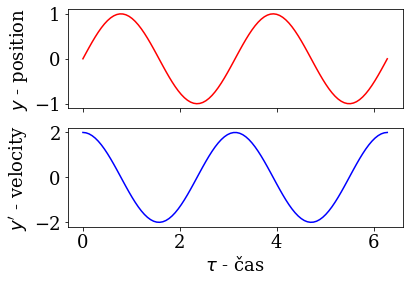

In [30]:

t = np.linspace(0, 2 * np.pi, 100)
y_ball = np.sin(2 * t)
v_ball = 2 * np.cos(2 * t)


fig, (ax_y, ax_v) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax_y.plot(t, y_ball, 'red')
#ax_y.set_xlabel('$t$')
ax_y.set_ylabel('$y$ - position')

ax_v.plot(t, v_ball, 'blue')
ax_v.set_xlabel("$\\tau$ - čas")
ax_v.set_ylabel("$y'$ - velocity")
    


### Zdvojené osy (twin axes)

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

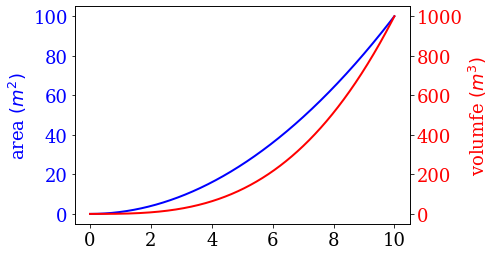

In [31]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volumfe $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

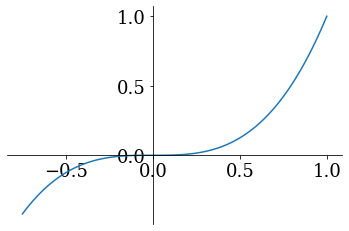

In [32]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [33]:
n = np.array([0,1,2,3,4,5])

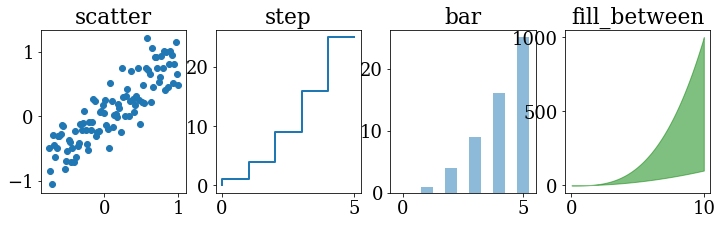

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

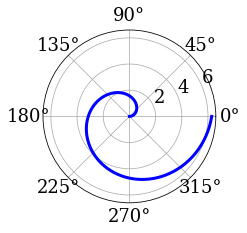

In [35]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

## Statistické grafy
lepší pomocí knihovny [`seaborn`](https://seaborn.pydata.org/)

### Histogram a ECDF

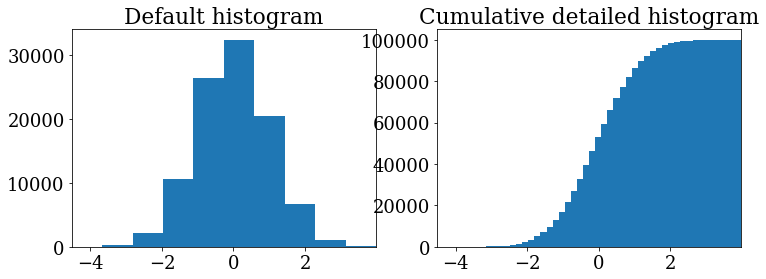

In [58]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Krabicové grafy

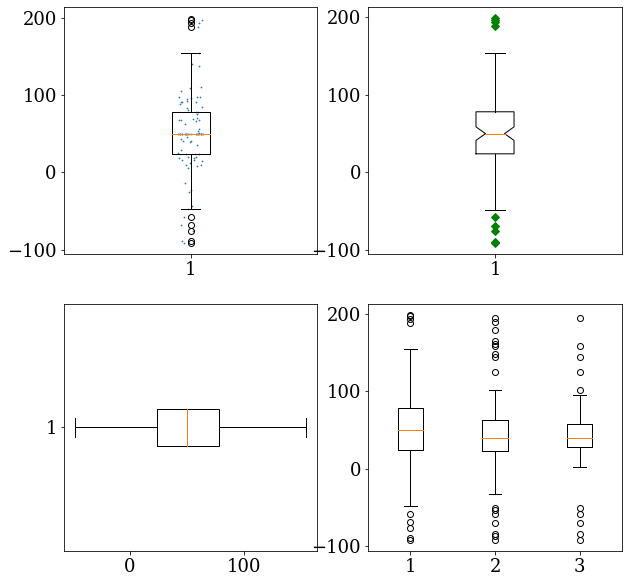

In [37]:

def make_data(mean):
    """
    Return nontrivial random dataset vector.
    """
    spread = np.random.rand(50) * 100
    center = np.ones(25) * mean
    flier_high = np.random.rand(10) * 100 + 100
    flier_low = np.random.rand(10) * -100
    return np.concatenate((spread, center, flier_high, flier_low), 0)


data = make_data(50)
fig, axes = plt.subplots(2, 2, figsize=(10,10))
(ax1, ax2), (ax3, ax4) = axes

# Box plot with outlayers.
ax1.boxplot(data)

# show jittered data
ax1.scatter(np.random.rand(len(data))*0.1 + 1 - 0.05, data, s=0.5)

# Box plot variant (notched plot), outlayer color and symbols, lot of other options...
ax2.boxplot(data, notch=True, sym='gD')

# Horizontal box, no outlayers
ax3.boxplot(data, vert=False, sym='')


# fake up some more data
d2 = make_data(40)

data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# multiple box plots on one figure
ax4.boxplot(data)

plt.show()



# Cvičení

## elipsy
- nakreslete pomocí `plot` elipsy 
  $$ y = \pm b \sqrt{1 - \Big(\frac{x}{a}\Big)^2} $$
  s velkou poloosou $a=1$ a malou poloosou $b$: `np.arange(-1, 1, 0.1)`.
  
- proveďte do jednoho rámečku různými barvami
- zobrazte legendu
- přiřaďte barvy ze spojité barevné mapy (např. `viridis`)
- místo legendy použijte `plt.colorbar(ax)`

## zrychlený pohyb
- pro posloupnost časů $t_i$ vypočťete přesnou trajektorii $y_i = t_i^2$ 
- dále použijte funkci `np.randn` pro vygenerování vektoru chyb a výsledů simulovaného měření $z_i$
- zobrazte přesnou trajektorii spolu s měřenými hodnotami
- zkuste toto realizovat pro tři různé trajektorie, vhodně odlište

## kosatce
- load iris dataset:

        import seaborn as sns
        iris = sns.load_dataset('iris')
        print(iris)
       
- extrahujte sloupec `iris[<var name>]`
- vyrobte boxploty pro jednotlivé sloupce data setu
- scatter ploty pro různé dvojice sloupců
- violin ploty rozděleně podle `species`


In [38]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Další a další možnosti ...

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

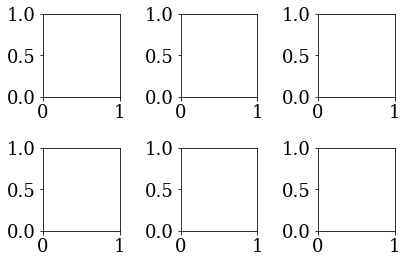

In [39]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

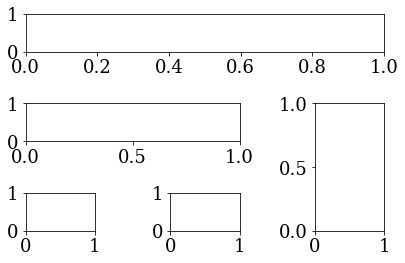

In [40]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [41]:
import matplotlib.gridspec as gridspec

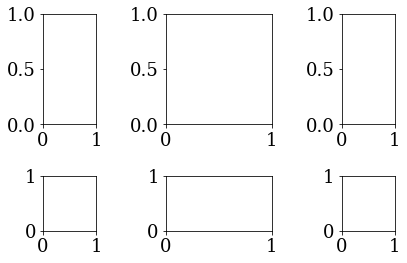

In [42]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

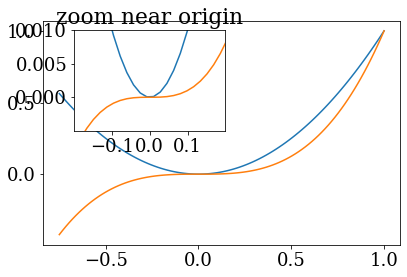

In [43]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [44]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [45]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

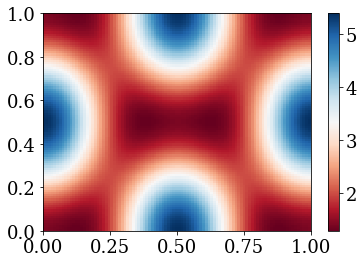

In [46]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

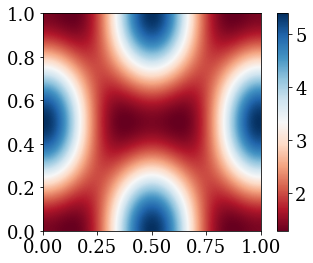

In [47]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

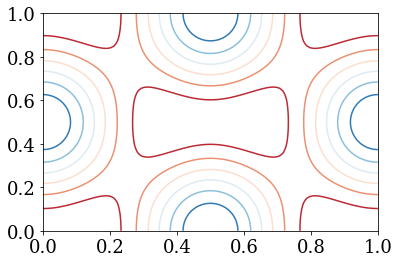

In [48]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures
**!! matplotlib neumí opravdovou 3d grafiku, pouze jednoduché plochy!!**

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

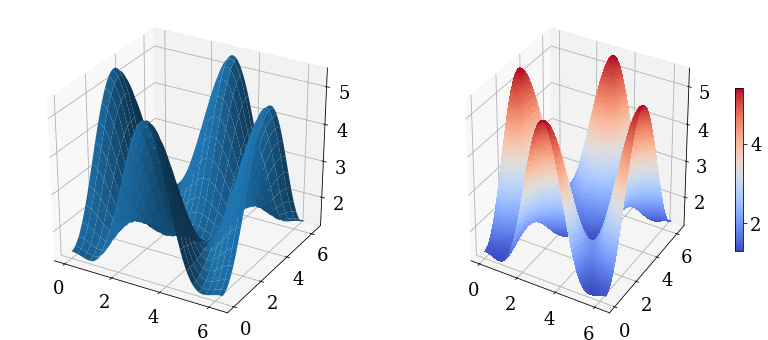

In [50]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

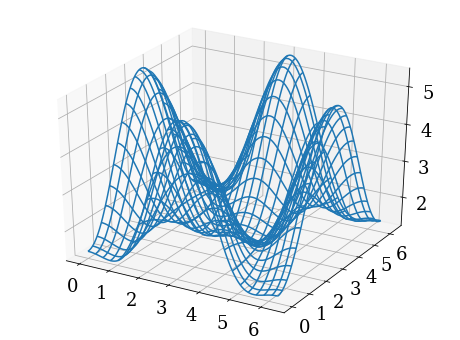

In [51]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

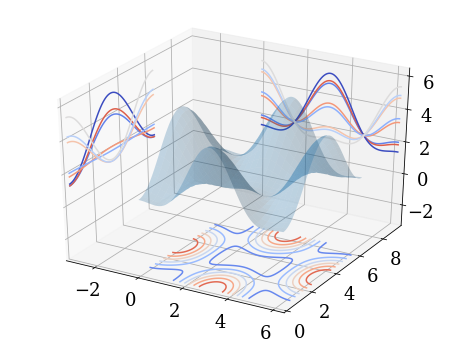

In [52]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

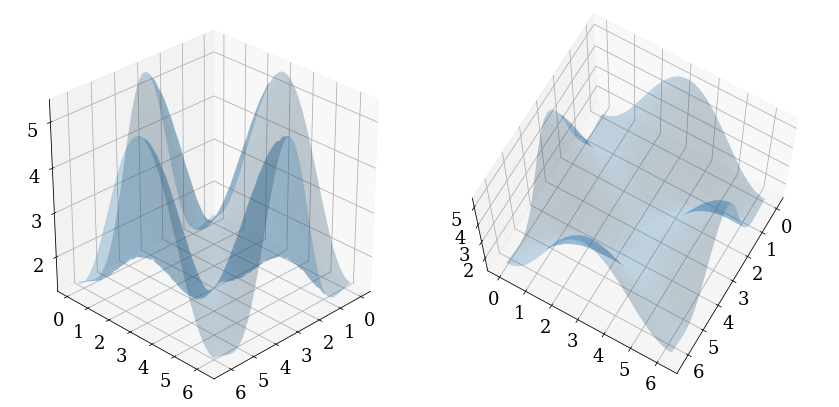

In [53]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Animations

Matplotlib also includes a simple API for generating animations for sequences of figures. With the `FuncAnimation` function we can generate a movie file from sequences of figures. The function takes the following arguments: `fig`, a figure canvas, `func`, a function that we provide which updates the figure, `init_func`, a function we provide to setup the figure, `frame`, the number of frames to generate, and `blit`, which tells the animation function to only update parts of the frame which have changed (for smoother animations):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

In [54]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# solve the ode problem of the double compound pendulum again
from scipy.integrate import odeint
sin, cos = np.sin, np.cos

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

print('ODE solved')

ODE solved


Generate an animation that shows the positions of the pendulums as a function of time:

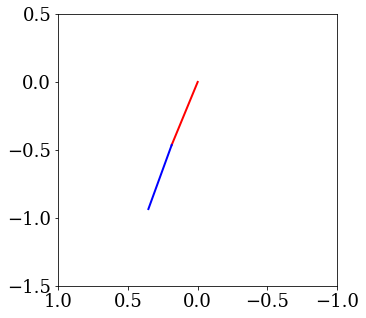

In [55]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])  
    return [pendulum1, pendulum2]

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    return [pendulum1, pendulum2]
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# For embedding into Jupiter notebook.
from IPython.display import HTML
HTML(anim.to_html5_video())

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
#anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")



#plt.close(fig)

Note: To generate the movie file we need to have either `ffmpeg` or `avconv` installed. Install it on Ubuntu using:

    $ sudo apt-get install ffmpeg

or (newer versions)

    $ sudo apt-get install libav-tools

On MacOSX, try: 

    $ sudo port install ffmpeg

In [56]:
from IPython.display import HTML
video = open("animation.mp4", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

FileNotFoundError: [Errno 2] No such file or directory: 'animation.mp4'

### Backends

Matplotlib has a number of "backends" which are responsible for rendering graphs. The different backends are able to generate graphics with different formats and display/event loops. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate image files (e.g. with the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [ ]:
print(matplotlib.rcsetup.all_backends)

#### Interactive backend (this makes more sense in a python script file)

In [ ]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('Qt4Agg') # or for example MacOSX
import matplotlib.pylab as plt
import numpy as np

In [ ]:
# Now, open an interactive plot window with the Qt4Agg backend
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
plt.show()

Note that when we use an interactive backend, we must call `plt.show()` to make the figure appear on the screen.

## Další zdroje

- [Matplotlib web](http://www.matplotlib.org) - web projektu, dokumnetace.

- [Matplotlib cheetsheet](https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png)

### Galerie

- [Matplotlib galery](http://matplotlib.org/gallery.html) - galerie grafů z matplotlibu 
- [Python graph galery](https://python-graph-gallery.com/) - obrázky grafů  z různých knihoven a jejich kód
- [Špatné grafy](https://www.data-to-viz.com/caveats.html) a jak se jich vyvarovat

### Tutoriály

- [J. R. Johanson: Matplotlib Tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) - hlavní inspirace tohotot sešitu
- http://www.loria.fr/~rougier/teaching/matplotlib - matplot přehled

- [Anatomy of Matplotlib](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/tree/master/) ... výborný tutoriál a přehled nejpoužívanějších funkce

- [Oficiální tutoriály](https://matplotlib.org/tutorials/index.html) pro různé typy grafů na stránkách Matplotlib.

### Další knihovny na grafy

[Seaborn](https://seaborn.pydata.org/) - založená na matplotlib, lepší výchozí vzhled, specializované typy grafů zejména pro statistiku
[quick tutorial](https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm)

[Plotly](https://plot.ly/python/line-and-scatter/) - částečně komerční, grafy v prohlížeči, skutečné 3d grafy, vektorový výstup placený
